# Introdução aos grafos em Python

Vamos nos focar nos básicos por enquanto. Eu não quero te mandar um material um material muito teórico porque nosso problema é de aplicação. Então vamos importar o NetwrokX para aprendermos algumas coisas mais básicas sobre grafos.

In [1]:
import networkx as nx

O primeiro ponto importante você já deve saber, um grafo é uma estrtura matemática composta por vértices e arestas.

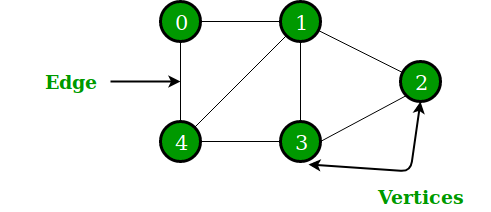

No nosso contexto, o jeito mais direto de representar redes urbanas de transporte é como um conjunto de interseções (nós) e segmentos de via (arestas). Existe também uma outra representação muito útil em redes urbanas (representação dual), mas vamos deixar ela para depois.

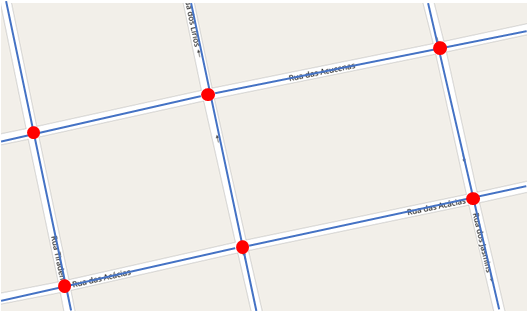

Outra coisa importante é que os grafos se dividem essemcialmente em daus categorias, **direcionados** e **não direcionados**. 

Em grafos direcionados, cada aresta tem um sentido bem definido. Imagine uma rede para carros em que as ruas têm um sentido de tráfego bem definido. Em termos mais gerais, isso significa que uma aresta do nó A para o B implica existência de uma rota de A para B, mas não uma de B para A. Assim, caso você queira indicar em um grafo direcionado que existem ambos os sentidos (como em uma avenida), são necessárias duas arestas: A-B e B-A.

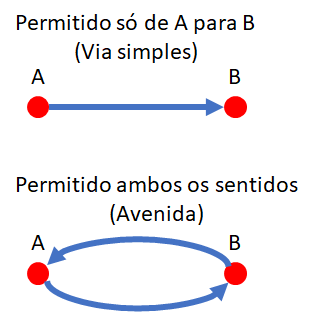

Já em grafos não direcionados, toda aresta permite o fluxo em ambos os sentidos (uma aresta A-B equivale ao conjunto A-B/B-A num grafo direcionado). Esse é o caso de uma rede para pedestres, por exemplo. O nome é meio elusivo, porque não ser direcionado na verdade significa que toda aresta é bidirecionada, mas não sou eu quem faz a nomenclatura.


No NetworkX, a classe de grafos não direcionados é a `Graph`, e a dos direcionados é `DiGraph`. Vamos construir uma rede com um grafo direcionado:

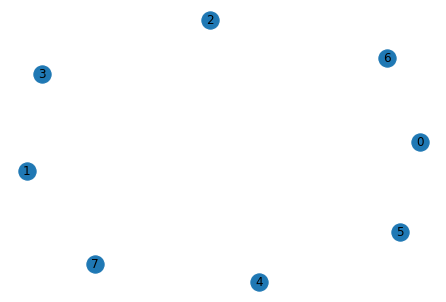

In [2]:
#Primeiro, vamos iniciar um grafo vazio. Vamos adicionar os elementos dele depois
G = nx.DiGraph()

#Definimos os nós e uma posição x e y para cada um
nodes = [str(n) for n in range(8)]
attrs = {'0':{'x':0,'y':1},
         '1':{'x':1,'y':2},
         '2':{'x':2,'y':1},
         '3':{'x':1,'y':0},
         '4':{'x':3,'y':1},
         '5':{'x':4,'y':2},
         '6':{'x':5,'y':1},
         '7':{'x':4,'y':0}}

#Adicionamos os nós ao grafo:
G.add_nodes_from(nodes)
#E os atributos aos nós
nx.set_node_attributes(G,attrs)

#Agora plotamos o Grafo com o NetworkX 
nx.draw(G,with_labels = True)

Veja que não é porque os nós têm um atributo x e um y que eles serão plotados no local correto. Para que isso aconteça, precisamos dar para a função a posição dos nós na forma de um dicionário com chaves iguais aos nomes dos nós e valores iguais a tuplas com as coordenadas (x,y).

In [3]:
# uma maneira boa para se iterar pelos dados de um grafo é por
# G.nodes(data=True). Isso retorna uma sequencia de nós e um
# dicionário com os atributos dos nós
pos={}
for node, data in G.nodes(data=True):
    pos[node] = (data['x'] , data['y'])
pos

{'0': (0, 1),
 '1': (1, 2),
 '2': (2, 1),
 '3': (1, 0),
 '4': (3, 1),
 '5': (4, 2),
 '6': (5, 1),
 '7': (4, 0)}

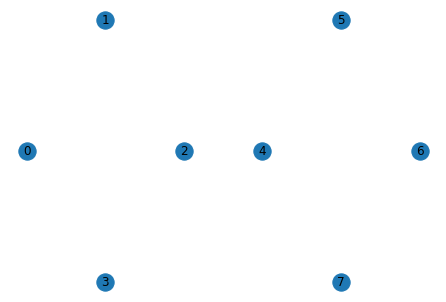

In [4]:
#agora plotamos de novo
nx.draw(G,with_labels = True,pos=pos)

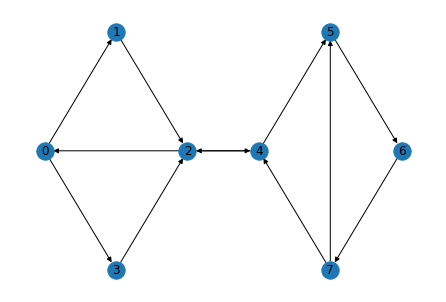

In [5]:
#vamos adicionar algumas arestas:
edges = [("0","1"),("1","2"),("0","3"),("3","2"),("2","0"),
         ("2","4"),("4","5"),("7","4"),("7","5"),("5","6"),
         ("6","7"),("4","2")]
#e comprimentos de cada aresta (em metros)
attrs = {("0","1"):{'length':100},("1","2"):{'length':50},
         ("0","3"):{'length':20},("3","2"):{'length':60},
         ("2","0"):{'length':80},("2","4"):{'length':100},
         ("4","5"):{'length':100},("7","4"):{'length':30},
         ("7","5"):{'length':80},("5","6"):{'length':90},
         ("6","7"):{'length':120},("4","2"):{'length':100}}
G.add_edges_from(edges)
nx.set_edge_attributes(G,attrs)
#desenhar o grafo
nx.draw(G,with_labels = True, pos=pos)

Agora vamos tentar encontrar alguns caminho entre nós. Em geral, o que queremos dizer por *caminhos* são *caminhos mínimos* ou os caminhos de menor comprimento entre eles. Entre o nó 0 e o 4, por exemplo, existe o caminho **0-3-2-4**, mas também o caminho **0-3-2-0-1-2-4**; ambos chegam a 4, mas um deles é menor. Vamos encontrar o menor caminho com o algoritmos de Dijkstra.
https://pt.wikipedia.org/wiki/Algoritmo_de_Dijkstra

In [6]:
path = nx.dijkstra_path(G,source="0",target="4")
path

['0', '1', '2', '4']

In [7]:
#Agora note que as arestas têm comprimentos diferentes, 
#mas esse algoritmo não está levando isso em consideração
#para tanto precisamos definir qual o peso da aresta
path = nx.dijkstra_path(G,source="0",target="4",weight='length')
path

['0', '3', '2', '4']

# Centralidades

Primeiro, é interessante saber um pouco sobre como funcionam centralidades no grafo. Em vez de explicar aqui, vou recomendar ler o artigo da wikipedia, ele já é bastante completo. https://pt.wikipedia.org/wiki/Centralidade

Vamos programar algumas delas do zero só para entender melhor.

## Centralidade de proximidade

A centraldiade de proximidade depende da distância de um nó aos outros. Podemos pegar essas distâcias fazendo os caminhos mínimos de um nó para todos os outros. Por, exemplo para o nó zero:

In [8]:
#cria um dicionário para armazenar todas as distâncias
lengths = {}
#vamos utilizar o nó zero como foco
source = "0"
#fazemos um loop por todos os nós
for target in (str(n) for n in G.nodes):
    #comprimento do caminho mínimo (em metros)
    l = nx.dijkstra_path_length(G, source=source, target=target, weight='length')
    lengths[target] = l
lengths

{'0': 0, '1': 100, '2': 80, '3': 20, '4': 180, '5': 280, '6': 370, '7': 490}

In [9]:
#podemos fazer isso para todos os nós:
all_pairs={}
for source in G.nodes:
    lengths={}
    for target in (str(n) for n in G.nodes):
        l = nx.dijkstra_path_length(G, source=source, target=target, weight='length')
        lengths[target] = l
    all_pairs[source] = lengths
all_pairs

{'0': {'0': 0,
  '1': 100,
  '2': 80,
  '3': 20,
  '4': 180,
  '5': 280,
  '6': 370,
  '7': 490},
 '1': {'0': 130,
  '1': 0,
  '2': 50,
  '3': 150,
  '4': 150,
  '5': 250,
  '6': 340,
  '7': 460},
 '2': {'0': 80,
  '1': 180,
  '2': 0,
  '3': 100,
  '4': 100,
  '5': 200,
  '6': 290,
  '7': 410},
 '3': {'0': 140,
  '1': 240,
  '2': 60,
  '3': 0,
  '4': 160,
  '5': 260,
  '6': 350,
  '7': 470},
 '4': {'0': 180,
  '1': 280,
  '2': 100,
  '3': 200,
  '4': 0,
  '5': 100,
  '6': 190,
  '7': 310},
 '5': {'0': 420,
  '1': 520,
  '2': 340,
  '3': 440,
  '4': 240,
  '5': 0,
  '6': 90,
  '7': 210},
 '6': {'0': 330,
  '1': 430,
  '2': 250,
  '3': 350,
  '4': 150,
  '5': 200,
  '6': 0,
  '7': 120},
 '7': {'0': 210,
  '1': 310,
  '2': 130,
  '3': 230,
  '4': 30,
  '5': 80,
  '6': 170,
  '7': 0}}

In [10]:
#na verdade existe uma função que faz isso para você (e é mais eficiente)
#mas é bom sempre aprender o que as coisas estão fazendo
all_pairs = nx.all_pairs_dijkstra_path_length(G, weight='length')
all_pairs = dict(all_pairs)
all_pairs

{'0': {'0': 0,
  '3': 20,
  '2': 80,
  '1': 100,
  '4': 180,
  '5': 280,
  '6': 370,
  '7': 490},
 '1': {'1': 0,
  '2': 50,
  '0': 130,
  '4': 150,
  '3': 150,
  '5': 250,
  '6': 340,
  '7': 460},
 '2': {'2': 0,
  '0': 80,
  '4': 100,
  '3': 100,
  '1': 180,
  '5': 200,
  '6': 290,
  '7': 410},
 '3': {'3': 0,
  '2': 60,
  '0': 140,
  '4': 160,
  '1': 240,
  '5': 260,
  '6': 350,
  '7': 470},
 '4': {'4': 0,
  '5': 100,
  '2': 100,
  '0': 180,
  '6': 190,
  '3': 200,
  '1': 280,
  '7': 310},
 '5': {'5': 0,
  '6': 90,
  '7': 210,
  '4': 240,
  '2': 340,
  '0': 420,
  '3': 440,
  '1': 520},
 '6': {'6': 0,
  '7': 120,
  '4': 150,
  '5': 200,
  '2': 250,
  '0': 330,
  '3': 350,
  '1': 430},
 '7': {'7': 0,
  '4': 30,
  '5': 80,
  '2': 130,
  '6': 170,
  '0': 210,
  '3': 230,
  '1': 310}}

Proximidade é definida como 1/distância

In [11]:
#proximidade entre o nó zero e o nó 4
1/all_pairs['0']['4']

0.005555555555555556

In [12]:
#proximidade média entre o nó zero e o resto
mean0 = 1/sum(all_pairs['0'][str(n)] for n in range(0,8))
mean0

0.0006578947368421052

In [13]:
#proximidade média entre o nó 4 e o resto
mean4 = 1/sum(all_pairs['4'][str(n)] for n in range(0,8))
mean4

0.0007352941176470588

In [14]:
#Isso significa que o nó 4, mais central, é em média mais próximo aos outros
mean0/mean4

0.8947368421052632

In [15]:
#Em geral, é mais comum "normalizar" essa medida para que o tamanho do grafo
#interfira menos nela. Isso significa simplesmente multiplicar cada valor por N
#onde N é o número de nós
N=len(G.nodes)

print('proximidade 0:', (N-1)*mean0,'\n'
      'proximidade 4:', (N-1)*mean4)

proximidade 0: 0.004605263157894736 
proximidade 4: 0.005147058823529412


Como anteriormente, existe uma função para isso como padrão, o NeworkX utiliza a distância de "entrada" ou seja, a proximidade de 0 a 4 é `1/all_pairs['4']['0']`, o inverso do que fizemos (e queremos). Por isso, para a função resultar igual, precisamos utilizar o grafo reverso (na outra biblioteca que vou mostrar isso não é necessário).

In [16]:
#Grafo reverso
G_new = G.reverse()
#E agora aplicamos a função
nx.closeness_centrality(G_new,distance='length')

{'0': 0.004605263157894736,
 '1': 0.004575163398692811,
 '2': 0.005147058823529412,
 '3': 0.004166666666666667,
 '4': 0.005147058823529412,
 '5': 0.003097345132743363,
 '6': 0.003825136612021858,
 '7': 0.00603448275862069}

## Centralidade de intermediação

A centraldiade de intermediação é um pouco mais complicada. ela depende de quantos dos caminhos mínimos estão passando por cada nó ou aresta. Relembrando de como o NetworkX nos mostra como um caminho mínimo é:

In [20]:
path = nx.dijkstra_path(G,source="0",target="4",weight='length')
path

['0', '3', '2', '4']

Nesse caso aí, o caminho passa pelos nós **0, 3, 2** e **4** e pelas arestas **(0,3), (3,2)** e **(2,4)**. Nesse caso já existe uma função que retorna todos os caminhos mínimos: 

In [46]:
all_pairs = nx.all_pairs_dijkstra_path(G, weight='length')
all_pairs = dict(all_pairs)
all_pairs

{'0': {'0': ['0'],
  '1': ['0', '1'],
  '3': ['0', '3'],
  '2': ['0', '3', '2'],
  '4': ['0', '3', '2', '4'],
  '5': ['0', '3', '2', '4', '5'],
  '6': ['0', '3', '2', '4', '5', '6'],
  '7': ['0', '3', '2', '4', '5', '6', '7']},
 '1': {'1': ['1'],
  '2': ['1', '2'],
  '0': ['1', '2', '0'],
  '4': ['1', '2', '4'],
  '3': ['1', '2', '0', '3'],
  '5': ['1', '2', '4', '5'],
  '6': ['1', '2', '4', '5', '6'],
  '7': ['1', '2', '4', '5', '6', '7']},
 '2': {'2': ['2'],
  '0': ['2', '0'],
  '4': ['2', '4'],
  '1': ['2', '0', '1'],
  '3': ['2', '0', '3'],
  '5': ['2', '4', '5'],
  '6': ['2', '4', '5', '6'],
  '7': ['2', '4', '5', '6', '7']},
 '3': {'3': ['3'],
  '2': ['3', '2'],
  '0': ['3', '2', '0'],
  '4': ['3', '2', '4'],
  '1': ['3', '2', '0', '1'],
  '5': ['3', '2', '4', '5'],
  '6': ['3', '2', '4', '5', '6'],
  '7': ['3', '2', '4', '5', '6', '7']},
 '4': {'4': ['4'],
  '5': ['4', '5'],
  '2': ['4', '2'],
  '6': ['4', '5', '6'],
  '0': ['4', '2', '0'],
  '1': ['4', '2', '0', '1'],
  '3': ['

Nesse caso, se quiser referenciar um caminho qualquer, é só fazer all_pair[s][t]

In [19]:
all_pairs['0']['4']

['0', '3', '2', '4']

In [48]:
#Agora é um for um pouco maior, isso porque intermediação 
#não pode ser feita nó a nó, precisa ser numa tacada só

#primeiro iniciamos um dicionário cujas chaves são os nós e todos os
#valores de betweenness são zero
betweenness = {n:0 for n in G.nodes}
for source in G.nodes:
    for target in G.nodes:
        #ignora quando o caminho tem comprimento zero
        if source==target: continue
        #agora adicionamos uma entrada para cada nó no caminho
        #nota, observe que ignoramos os pontos de início e final
        for node in all_pairs[source][target]:
            if node == source or node==target: continue
            betweenness[node] += 1

In [49]:
betweenness

{'0': 12, '1': 0, '2': 28, '3': 5, '4': 24, '5': 11, '6': 11, '7': 11}

Agora para "normalizar" esse valor temos que dividir cada valor por (N-1)*(N-2) - Número total de caminhos mínimos no grafo

In [51]:
N = len(G.nodes)
betweenness = {n:b/((N-1)*(N-2)) for n,b in betweenness.items()}
betweenness

{'0': 0.2857142857142857,
 '1': 0.0,
 '2': 0.6666666666666666,
 '3': 0.11904761904761904,
 '4': 0.5714285714285714,
 '5': 0.2619047619047619,
 '6': 0.2619047619047619,
 '7': 0.2619047619047619}

In [53]:
#E também existe uma função para isso
nx.betweenness_centrality(G,weight='length')

{'0': 0.2857142857142857,
 '1': 0.0,
 '2': 0.6666666666666666,
 '3': 0.11904761904761904,
 '4': 0.5714285714285714,
 '5': 0.26190476190476186,
 '6': 0.26190476190476186,
 '7': 0.26190476190476186}

Agora para o caso de intermediação de arestas, o processo é análogo, mas em vez de olhar os nós, olharemos as arestas. Primeiro vamos fazer uma função para tornar uma sequencia de nós em uma sequencia de arestas

In [54]:
def get_edges(path):
    #se só existe um nó, n passa em aresta nenhuma
    if len(path)==1:
        return []
    edges = []
    #vamos fazer um loop que percorre os índices da lista e cria arestas
    for index in range(len(path)-1):
        edges.append((path[index],path[index+1]))
    return edges    

In [55]:
#para o nosso caminho
print(path)
get_edges(path)

['0', '3', '2', '4']


[('0', '3'), ('3', '2'), ('2', '4')]

Agora faremos essencialmente a mesma coisa, mas com as arestas

In [65]:
#agora iniciamos um dicionário com as arestas
betweenness = {e:0 for e in G.edges}
for source in G.nodes:
    for target in G.nodes:
        #ignora quando o caminho tem comprimento zero
        if source==target: continue
        #agora adicionamos uma entrada para cada aresta no caminho
        edges = get_edges(all_pairs[source][target])
        for e in edges:
            betweenness[e] += 1
betweenness

{('0', '1'): 7,
 ('0', '3'): 12,
 ('1', '2'): 7,
 ('2', '0'): 19,
 ('2', '4'): 16,
 ('3', '2'): 12,
 ('4', '5'): 15,
 ('4', '2'): 16,
 ('5', '6'): 18,
 ('6', '7'): 18,
 ('7', '4'): 15,
 ('7', '5'): 3}

In [66]:
#normalizar
#dessa vez o total de caminhos é (N)*(N-1) porque consideramos as pontas
N = len(G.nodes)
betweenness = {n:b/((N)*(N-1)) for n,b in betweenness.items()}
betweenness

{('0', '1'): 0.125,
 ('0', '3'): 0.21428571428571427,
 ('1', '2'): 0.125,
 ('2', '0'): 0.3392857142857143,
 ('2', '4'): 0.2857142857142857,
 ('3', '2'): 0.21428571428571427,
 ('4', '5'): 0.26785714285714285,
 ('4', '2'): 0.2857142857142857,
 ('5', '6'): 0.32142857142857145,
 ('6', '7'): 0.32142857142857145,
 ('7', '4'): 0.26785714285714285,
 ('7', '5'): 0.05357142857142857}

In [68]:
#função pronta
nx.edge_betweenness(G,weight='length')

{('0', '1'): 0.125,
 ('0', '3'): 0.21428571428571427,
 ('1', '2'): 0.125,
 ('2', '0'): 0.33928571428571425,
 ('2', '4'): 0.2857142857142857,
 ('3', '2'): 0.21428571428571427,
 ('4', '5'): 0.26785714285714285,
 ('4', '2'): 0.2857142857142857,
 ('5', '6'): 0.3214285714285714,
 ('6', '7'): 0.3214285714285714,
 ('7', '4'): 0.26785714285714285,
 ('7', '5'): 0.05357142857142857}